In [2]:
%matplotlib inline

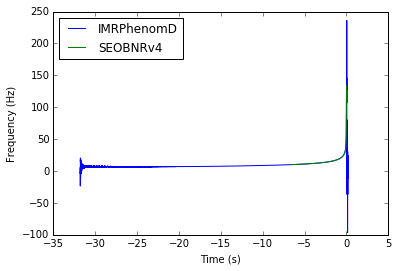

In [3]:
import pylab
from pycbc import waveform
from pycbc import conversions

f_low = 10
sample_rate = 2 * 4096

m1 = conversions.mass1_from_mtotal_q(100, 10)
m2 = conversions.mass2_from_mtotal_q(100, 10)

hp1, hc1 = waveform.get_td_waveform(approximant="IMRPhenomD",
                                mass1=m1,
                                mass2=m2,
                                delta_t=1.0/sample_rate,
                                f_lower=f_low)

hp1, hc1 = hp1.trim_zeros(), hc1.trim_zeros()
amp1 = waveform.utils.amplitude_from_polarizations(hp1, hc1)
f1 = waveform.utils.frequency_from_polarizations(hp1, hc1)

hp2, hc2 = waveform.get_td_waveform(approximant="SEOBNRv4",
                                mass1=m1,
                                mass2=m2,
                                delta_t=1.0/sample_rate,
                                f_lower=f_low)

hp2, hc2 = hp2.trim_zeros(), hc2.trim_zeros()
amp2 = waveform.utils.amplitude_from_polarizations(hp2, hc2)
f2 = waveform.utils.frequency_from_polarizations(hp2, hc2)

pylab.plot(f1.sample_times, f1, label="IMRPhenomD")
pylab.plot(f2.sample_times, f2, label="SEOBNRv4")

pylab.ylabel('Frequency (Hz)')
pylab.xlabel('Time (s)')
pylab.legend(loc='upper left')
pylab.show()

In [26]:
# buggy version
hp, hc = waveform.get_td_waveform(approximant="HGimri",
                                mass1=m1,
                                mass2=m2,
                                delta_t=1.0/sample_rate,
                                f_lower=f_low)

print(len(hp))
print(len(hc))
print("triming")
hp, hc = hp.trim_zeros(), hc.trim_zeros()
print(len(hp))
print(len(hc))
print("trim_zeros didn't work for some reason.... but this is why the `amp` function didn't work")
print("If you don't trim then it works")

54549
54549
triming
54549
54548
trim_zeros didn't work for some reason.... but this is why the `amp` function didn't work
If you don't trim then it works


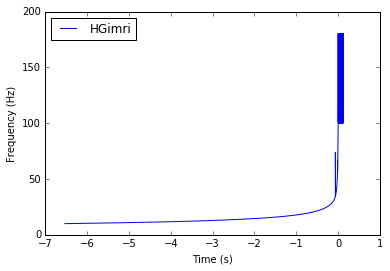

In [28]:
hp, hc = waveform.get_td_waveform(approximant="HGimri",
                                mass1=m1,
                                mass2=m2,
                                delta_t=1.0/sample_rate,
                                f_lower=f_low)

# hp, hc = hp.trim_zeros(), hc.trim_zeros()
amp = waveform.utils.amplitude_from_polarizations(hp, hc)
f = waveform.utils.frequency_from_polarizations(hp, hc)

pylab.plot(f.sample_times, f, label="HGimri")

pylab.ylabel('Frequency (Hz)')
pylab.xlabel('Time (s)')
pylab.legend(loc='upper left')
pylab.show()